<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h1>🌍 Vaccination Coverage — Global Analysis with Our World in Data</h1>
  <p>This notebook analyzes global trends in the coverage of nine different vaccines, including <strong>Hepatitis B</strong>, <strong>Measles</strong>, <strong>Diphtheria</strong>, <strong>Tetanus</strong>, and <strong>Pertussis</strong>, using data from 
  <a href="https://ourworldindata.org/">Our World in Data</a>, an online publication developed by researchers at the <strong>University of Oxford</strong>. Its mission is to show how the world is changing through <em>empirical data</em>, <em>interactive visualizations</em>, and <em>accessible analysis</em> for the general public.</p>

  <h2>📁 Dataset Overview</h2>
  <p>We use the <strong>Global Vaccination Coverage</strong> dataset, which provides information on the <strong>percentage and type of vaccine</strong> administered relative to each country's total population.</p>

  <h2>📌 Key Objectives</h2>
  <ul>
    <li>🔍 Identify global and regional patterns in vaccination coverage.</li>
    <li>🌎 Highlight contrasts across continents and countries.</li>
    <li>📈 Analyze historical trends for nine vaccine-preventable diseases.</li>
  </ul>

  <blockquote>This analysis aims to uncover patterns, regional disparities, and long-term trends in global vaccination coverage.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h1>🌍 Cobertura de Vacunación — Análisis Global con Our World in Data</h1>
  <p>Este notebook analiza las tendencias globales en la cobertura de <strong>nueve vacunas diferentes</strong>, entre las que se incluyen <strong>Hepatitis B</strong>, <strong>Sarampión</strong>, <strong>Difteria</strong>, <strong>Tétanos</strong> y <strong>Tosferina</strong>, utilizando datos de 
  <a href="https://ourworldindata.org/">Our World in Data</a>, una publicación en línea desarrollada por investigadores de la <strong>Universidad de Oxford</strong>. Su objetivo es mostrar cómo está cambiando el mundo a través de <em>datos empíricos</em>, <em>visualizaciones interactivas</em> y <em>análisis accesibles</em> para el público general.</p>

  <h2>📁 Conjunto de datos</h2>
  <p>Se utiliza el conjunto de datos <strong>Global Vaccination Coverage</strong>, que contiene información sobre el <strong>porcentaje y tipo de vacuna</strong> en relación con la población total de cada país.</p>

  <h2>📌 Objetivos clave</h2>
  <ul>
    <li>🔍 Identificar patrones globales y regionales en la cobertura de vacunación.</li>
    <li>🌎 Resaltar contrastes entre continentes y países.</li>
    <li>📈 Analizar tendencias históricas para nueve enfermedades prevenibles por vacunación.</li>
  </ul>

  <blockquote>Este análisis busca identificar patrones, contrastes regionales y tendencias históricas en la cobertura global de vacunación.</blockquote>
</div>


In [131]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry_convert as pc
import numpy as np
import dash
from dash import dcc, html, Input, Output
from sklearn.linear_model import LinearRegression

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h2>📥 Extracción de los datos / Data extraction</h2>
    <p>Se descarga el conjunto de datos directamente desde Our World in Data</p>
    <p>The dataset is downloaded directly from Our World in Data</p>
</div>

In [132]:
url = 'https://ourworldindata.org/grapher/global-vaccination-coverage.csv?v=1&csvType=full&useColumnShortNames=true'
df = pd.read_csv(url)
df.to_csv("../data/raw/Vaccination-coverage.csv", index=False)
print("Datos descargados correctamente")

Datos descargados correctamente


<div style="background-color:#fff9e6; padding:15px; border-radius:8px;">
  <h2>📊 Análisis previo de los datos / Preliminary data analysis</h2>
  <p>Se exploran las variables disponibles, se identifican valores faltantes y se examinan distribuciones generales por año y por país. Esta etapa permite entender la estructura del conjunto de datos y detectar posibles sesgos o inconsistencias antes de aplicar modelos o visualizaciones.</p>
  <p>We explore the available variables, identify missing values, and examine general distributions by year and country. This step helps understand the dataset’s structure and detect potential biases or inconsistencies before applying models or visualizations.</p>

  <h3>🔍 Columnas del DataFrame / Columns in the DataFrame</h3>
  <ol>
    <li><strong>Entity</strong> (object): Nombre del país / Country name</li>
    <li><strong>Code</strong> (object): Código ISO del país / Country ISO code</li>
    <li><strong>Year</strong> (int64): Año / Year</li>
    <li><strong>coverage__antigen_hepb3</strong> (float64): Hepatitis B (tercera dosis) / Hepatitis B (3rd dose)</li>
    <li><strong>coverage__antigen_hib3</strong> (float64): Haemophilus influenzae tipo b (tercera dosis) / Haemophilus influenzae type b (3rd dose)</li>
    <li><strong>coverage__antigen_ipv1</strong> (float64): Antipoliomielítica inactivada (primera dosis) / Inactivated Polio (1st dose)</li>
    <li><strong>coverage__antigen_mcv1</strong> (float64): Sarampión (primera dosis) / Measles-containing (1st dose)</li>
    <li><strong>coverage__antigen_pcv3</strong> (float64): Neumocócica conjugada (tercera dosis) / Pneumococcal conjugate (3rd dose)</li>
    <li><strong>coverage__antigen_pol3</strong> (float64): Polio (tercera dosis) / Polio (3rd dose)</li>
    <li><strong>coverage__antigen_rcv1</strong> (float64): Rubéola (primera dosis) / Rubella-containing (1st dose)</li>
    <li><strong>coverage__antigen_rotac</strong> (float64): Rotavirus / Rotavirus</li>
    <li><strong>coverage__antigen_dtpcv3</strong> (float64): DTP (difteria, tétanos, tosferina - tercera dosis) / DTP-containing (3rd dose)</li>
  </ol>
</div>

In [133]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9203 entries, 0 to 9202
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    9203 non-null   object 
 1   Code                      8174 non-null   object 
 2   Year                      9203 non-null   int64  
 3   coverage__antigen_hepb3   5644 non-null   float64
 4   coverage__antigen_hib3    4764 non-null   float64
 5   coverage__antigen_ipv1    2057 non-null   float64
 6   coverage__antigen_mcv1    9048 non-null   float64
 7   coverage__antigen_pcv3    2260 non-null   float64
 8   coverage__antigen_pol3    9179 non-null   float64
 9   coverage__antigen_rcv1    5481 non-null   float64
 10  coverage__antigen_rotac   1719 non-null   float64
 11  coverage__antigen_dtpcv3  9174 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 862.9+ KB


,Entity,Code,Year,coverage__antigen_hepb3,coverage__antigen_hib3,coverage__antigen_ipv1,coverage__antigen_mcv1,coverage__antigen_pcv3,coverage__antigen_pol3,coverage__antigen_rcv1,coverage__antigen_rotac,coverage__antigen_dtpcv3
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


<div style="background-color:#fff9e6; padding:15px; border-radius:8px;">
  <h2>🧹 Limpieza de datos / Cleaning data</h2>
  <p>Se identifican columnas con valores nulos, se calcula el porcentaje de datos faltantes y se eliminan registros vacíos. Esta etapa garantiza que el conjunto de datos esté limpio y listo para análisis precisos.</p>
  <p>Columns with missing values are identified, the percentage of missing data is calculated, and empty records are removed. This step ensures the dataset is clean and ready for accurate analysis.</p>

  <h3>🔎 Acciones realizadas / Actions performed</h3>
  <ul>
    <li>📊 Conteo y porcentaje de valores nulos por columna / Count and percentage of missing values per column</li>
    <li>🧼 Eliminación de filas completamente vacías / Removal of fully empty rows</li>
    <li>✅ Verificación final de valores nulos restantes / Final check for remaining missing values</li>
  </ul>
</div>

In [134]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display columns with missing values (if any)
columns_with_nulls = missing_values[missing_values > 0]
if len(columns_with_nulls) > 0:
    print("\nColumns with missing values:")
    for col, count in columns_with_nulls.items():
        print(f"{col}: {count} missing values ({missing_percentage[col]:.2f}%)")
else:
    print("\nNo missing values found in any column.")

Missing values in each column:
Entity                         0
Code                        1029
Year                           0
coverage__antigen_hepb3     3559
coverage__antigen_hib3      4439
coverage__antigen_ipv1      7146
coverage__antigen_mcv1       155
coverage__antigen_pcv3      6943
coverage__antigen_pol3        24
coverage__antigen_rcv1      3722
coverage__antigen_rotac     7484
coverage__antigen_dtpcv3      29
dtype: int64

Columns with missing values:
Code: 1029 missing values (11.18%)
coverage__antigen_hepb3: 3559 missing values (38.67%)
coverage__antigen_hib3: 4439 missing values (48.23%)
coverage__antigen_ipv1: 7146 missing values (77.65%)
coverage__antigen_mcv1: 155 missing values (1.68%)
coverage__antigen_pcv3: 6943 missing values (75.44%)
coverage__antigen_pol3: 24 missing values (0.26%)
coverage__antigen_rcv1: 3722 missing values (40.44%)
coverage__antigen_rotac: 7484 missing values (81.32%)
coverage__antigen_dtpcv3: 29 missing values (0.32%)


In [135]:
# Mostrar el número de filas antes de eliminar filas con valores nulos
print(f"Número de filas antes de eliminar valores nulos: {len(df)}")

# Eliminar filas que contienen al menos un valor nulo
df_clean = df.dropna(how="all")

# Mostrar el número de filas después de eliminar filas con valores nulos
print(f"Número de filas después de eliminar valores nulos: {len(df_clean)}")

# Verificar que no quedan valores nulos
print("\nVerificación de valores nulos restantes:")
print(df_clean.isna().sum())

Número de filas antes de eliminar valores nulos: 9203
Número de filas después de eliminar valores nulos: 9203

Verificación de valores nulos restantes:
Entity                         0
Code                        1029
Year                           0
coverage__antigen_hepb3     3559
coverage__antigen_hib3      4439
coverage__antigen_ipv1      7146
coverage__antigen_mcv1       155
coverage__antigen_pcv3      6943
coverage__antigen_pol3        24
coverage__antigen_rcv1      3722
coverage__antigen_rotac     7484
coverage__antigen_dtpcv3      29
dtype: int64


<div style="background-color:#fff9e6; padding:15px; border-radius:8px;">
  <h2>📈 Graficar los datos (gráficos estáticos) / Plotting the data (static charts)</h2>
  <p>Se generan visualizaciones estáticas para representar la cobertura de vacunación a nivel mundial y por continente. Se utiliza un mapa coroplético para mostrar la cobertura de Hepatitis B (tercera dosis) en el año 2024, y una gráfica de líneas para analizar la evolución de la cobertura de Haemophilus influenzae tipo b (tercera dosis) por continente.</p>
  <p>Static visualizations are created to represent vaccination coverage globally and by continent. A choropleth map displays Hepatitis B (third dose) coverage in 2024, and a line chart analyzes the evolution of Haemophilus influenzae type b (third dose) coverage by continent.</p>

  <h3>🛠️ Acciones realizadas / Actions performed</h3>
  <ul>
    <li>🌍 Filtrado de datos para el año 2024 / Data filtered for year 2024</li>
    <li>🗺️ Mapa coroplético de cobertura de Hepatitis B / Choropleth map of Hepatitis B coverage</li>
    <li>🌐 Asignación de continentes a cada país / Continent assignment for each country</li>
    <li>📊 Agrupación y promedio por continente y año / Grouping and averaging by continent and year</li>
    <li>📈 Gráfico de líneas para Haemophilus influenzae tipo b / Line chart for Haemophilus influenzae type b</li>
  </ul>
</div>

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h3>🗺️ Mapa cobertura de Hepatitis B tercera dosis en el 2024 / Map of Hepatitis B (3rd dose) coverage in 2024</h3>
</div>

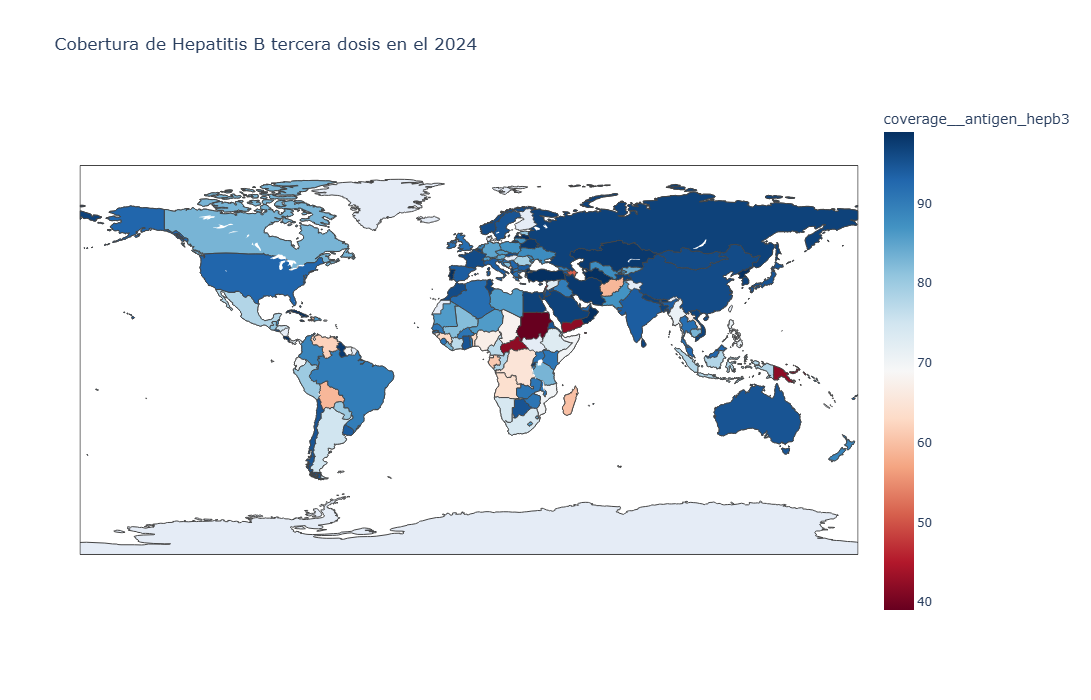

In [136]:
df_filtrado = df_clean[df_clean['Year']==2024]
fig = px.choropleth(df_filtrado, locations='Code', color='coverage__antigen_hepb3', hover_name='Entity',
                   color_continuous_scale='RdBu', title=' Cobertura de Hepatitis B tercera dosis en el 2024')
fig.update_layout(width=1000, height=700)
fig.show()

<div style="background-color:#d9d9d9; padding:15px; border-radius:8px;">
  <h3>📈 Línea de tendencia Haemophilus influenzae tipo b (tercera dosis) / Trend line of Haemophilus influenzae type b (third dose)</h3>
</div>

In [137]:
def get_continent(pais):
    try:
        codigo_alpha2 = pc.country_name_to_country_alpha2(pais)
        continent= pc.country_alpha2_to_continent_code(codigo_alpha2)
        return continent
    except:
        return "Desconocido"

df_clean['continent_code'] = df_clean['Entity'].apply(get_continent)

code_to_name = {
    'AF': 'África',
    'AS': 'Asia',
    'EU': 'Europa',
    'NA': 'América del Norte',
    'SA': 'América del Sur',
    'OC': 'Oceanía',
    'AN': 'Antártida'
}
df_clean['continent'] = df_clean['continent_code'].map(code_to_name)

df_clean['continent_code']= df_clean['Code'].apply(get_continent)
df_clean.head()

,Entity,Code,Year,coverage__antigen_hepb3,coverage__antigen_hib3,coverage__antigen_ipv1,coverage__antigen_mcv1,coverage__antigen_pcv3,coverage__antigen_pol3,coverage__antigen_rcv1,coverage__antigen_rotac,coverage__antigen_dtpcv3,continent_code,continent
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0,AS,Asia
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0,AS,Asia
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0,AS,Asia
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0,AS,Asia
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0,AS,Asia


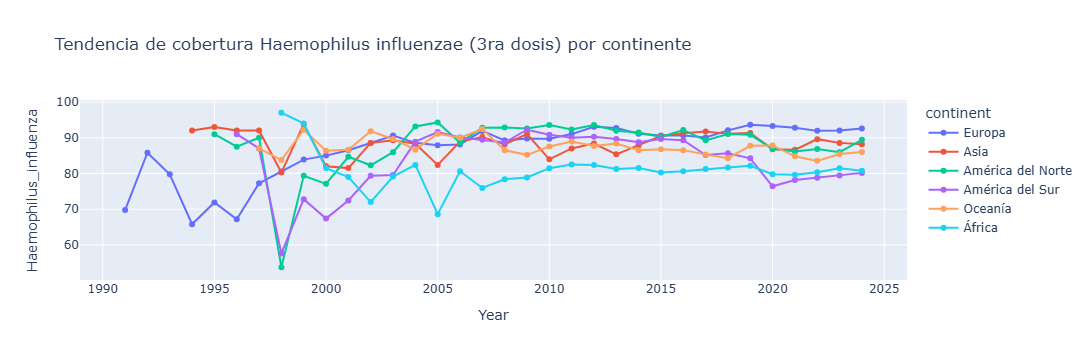

In [138]:
df_haemophilus = df_clean[['Year', 'continent', 'coverage__antigen_hib3']].dropna()
df_haemophilus_g = df_haemophilus.groupby(['Year', 'continent'])['coverage__antigen_hib3'].mean().reset_index()
df_haemophilus_g.rename(columns={'coverage__antigen_hib3': 'Haemophilus_influenza'}, inplace=True)

fig1 = px.line(df_haemophilus_g, x='Year', y='Haemophilus_influenza', color='continent', markers=True, 
              title='Tendencia de cobertura Haemophilus influenzae (3ra dosis) por continente')
fig1.show()

<div style="background-color:#fff9e6; padding:15px; border-radius:8px;">
  <h2>📊 Graficar los datos (gráficos dinámicos) / Plotting the data (interactive charts)</h2>
  <p>Se desarrolla una aplicación interactiva con <strong>Dash</strong> que permite explorar la cobertura de vacunación por tipo de vacuna, año, continente y país. Los usuarios pueden seleccionar filtros personalizados y visualizar los resultados en un mapa coroplético y una gráfica de líneas.</p>
  <p>An interactive application is built using <strong>Dash</strong> to explore vaccination coverage by vaccine type, year, continent, and country. Users can apply custom filters and view results through a choropleth map and a line chart.</p>

  <h3>🛠️ Funcionalidades clave / Key features</h3>
  <ul>
    <li>📌 Filtros dinámicos: vacuna, año, continente y país / Dynamic filters: vaccine, year, continent, and country</li>
    <li>🗺️ Mapa coroplético mundial por cobertura / Global choropleth map by coverage</li>
    <li>📈 Gráfico de líneas por continente o país / Line chart by continent or country</li>
    <li>🎨 Escala de color <strong>Viridis</strong> para visualización continua / <strong>Viridis</strong> color scale for continuous visualization</li>
    <li>⚙️ Callback para actualización simultánea de ambos gráficos / Callback to update both charts simultaneously</li>
  </ul>

  <blockquote>Esta visualización permite una exploración flexible y comparativa de la cobertura de vacunación a lo largo del tiempo y entre regiones.</blockquote>
</div>

In [139]:
vacunas = [col for col in df_clean.columns if col.startswith("coverage")]
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Cobertura global de vacunación", style={'textAlign': 'center'}),
    html.Hr(),

    # 🔹 Filtros arriba en una fila
    html.Div([
        html.Div([
            html.Label("Vacuna:"),
            dcc.Dropdown(
                id='vacuna-dropdown',
                options=[{'label': v.replace("coverage__antigen_", "").upper(), 'value': v} for v in vacunas],
                value=vacunas[0]
            )
        ], style={'width': '24%', 'display': 'inline-block', 'paddingRight': '1%'}),

        html.Div([
            html.Label("Año:"),
            dcc.Dropdown(
                id='anio-dropdown',
                options=[{'label': str(y), 'value': y} for y in sorted(df_clean['Year'].unique())],
                value=df_clean['Year'].max()
            )
        ], style={'width': '24%', 'display': 'inline-block', 'paddingRight': '1%'}),

        html.Div([
            html.Label("Continente:"),
            dcc.Dropdown(
                id='continente-dropdown',
                options=[{'label': c, 'value': c} for c in sorted(df_clean['continent'].dropna().unique())] + [{'label': 'Todos', 'value': 'Todos'}],
                value='Todos'
            )
        ], style={'width': '24%', 'display': 'inline-block', 'paddingRight': '1%'}),

        html.Div([
            html.Label("País:"),
            dcc.Dropdown(
                id='pais-dropdown',
                options=[{'label': p, 'value': p} for p in sorted(df_clean['Entity'].dropna().unique())] + [{'label': 'Todos', 'value': 'Todos'}],
                value='Todos'
            )
        ], style={'width': '24%', 'display': 'inline-block'})
    ], style={'padding': '10px 0'}),

    # 🔹 Gráficos abajo en dos columnas
    html.Div([
        html.Div([
            dcc.Graph(id='mapa-mundial', style={'height': '100%', 'width': '100%'})
        ], style={'flex': '1', 'paddingRight': '10px'}),
    
        html.Div([
            dcc.Graph(id='grafico-lineas', style={'height': '100%', 'width': '100%'})
        ], style={'flex': '1', 'paddingLeft': '10px'})
        ], style={
        'display': 'flex',
        'flexWrap': 'wrap',
        'width': '100%',
        'boxSizing': 'border-box'
    })
])


@app.callback(
    Output('mapa-mundial', 'figure'),
    Output('grafico-lineas', 'figure'),
    Input('vacuna-dropdown', 'value'),
    Input('anio-dropdown', 'value'),
    Input('continente-dropdown', 'value'),
    Input('pais-dropdown', 'value')
)

def update_charts(vacuna, anio, continente, pais):
    df_filter = df_clean[df_clean['Year'] == anio]

    if continente != 'Todos':
        df_filter = df_filter[df_filter['continent'] == continente]
    if pais != 'Todos':
        df_filter = df_filter[df_filter['Entity'] == pais]

    fig_mapa = px.choropleth(
        df_filter,
        locations='Code',
        color=vacuna,
        hover_name='Entity',
        color_continuous_scale='Viridis',
        title=f'Cobertura mundial de {vacuna.replace("coverage__antigen_", "").upper()} en {anio}'
    )
    fig_mapa.update_layout(width=900, height=500)

    # Gráfico de líneas
    df_line = df_clean.copy()
    if continente != 'Todos':
        df_line = df_line[df_line['continent'] == continente]
    if pais != 'Todos':
        df_line = df_line[df_line['Entity'] == pais]

    df_line = df_line[['Year', 'continent', 'Entity', vacuna]].dropna()
    group = 'Entity' if pais != 'Todos' else 'continent'
    df_line_agg = df_line.groupby(['Year', group])[vacuna].mean().reset_index()

    fig_lineas = px.line(
        df_line_agg,
        x='Year',
        y=vacuna,
        color=group,
        markers=True,
        title=f'Tendencia de cobertura de {vacuna.replace("coverage__antigen_", "").upper()}'
    )
    fig_lineas.update_layout(width=900, height=500)

    return fig_mapa, fig_lineas


if __name__ == '__main__':
    app.run(debug=True)

<div style="background-color:#fff9e6; padding:15px; border-radius:8px;">
  <h2>🤖 Algo de Inteligencia Artificial / A touch of Artificial Intelligence</h2>
  <p>Se aplica un modelo de <strong>regresión lineal</strong> para proyectar la cobertura de vacunación de Hepatitis B (tercera dosis) hasta el año 2030, agrupando por continente. Esta técnica permite estimar tendencias futuras basadas en datos históricos.</p>
  <p>A <strong>linear regression</strong> model is applied to project Hepatitis B (third dose) vaccination coverage through 2030, grouped by continent. This technique helps estimate future trends based on historical data.</p>

  <h3>🛠️ Acciones realizadas / Actions performed</h3>
  <ul>
    <li>📊 Filtrado y agrupación de datos por año y continente / Data filtering and grouping by year and continent</li>
    <li>📈 Entrenamiento de modelos de regresión lineal por grupo / Training linear regression models per group</li>
    <li>📅 Generación de predicciones para años futuros (hasta 2030) / Generating predictions for future years (up to 2030)</li>
    <li>🧩 Integración de datos reales y proyectados / Merging actual and projected data</li>
    <li>📉 Visualización de tendencias con líneas segmentadas / Trend visualization with dashed lines for projections</li>
  </ul>

  <blockquote>Este enfoque predictivo permite anticipar escenarios de cobertura y apoyar decisiones estratégicas en salud pública.</blockquote>
</div>

In [140]:
# Parámetros configurables
vacuna = 'coverage__antigen_hepb3' 
nivel = 'continent' 

# Filtrar y preparar datos
df_modelo = df_clean[['Year', nivel, vacuna]].dropna()
df_modelo_agg = df_modelo.groupby(['Year', nivel])[vacuna].mean().reset_index()

# Generar predicciones por grupo
predicciones = []
for g in df_modelo_agg[nivel].unique():
    df_g = df_modelo_agg[df_modelo_agg[nivel] == g].copy()
    X = df_g[['Year']]
    y = df_g[vacuna]
    modelo = LinearRegression()
    modelo.fit(X, y)

    años_futuros = pd.DataFrame({'Year': range(df_g['Year'].max() + 1, 2031)})
    y_pred = modelo.predict(años_futuros)

    df_pred = pd.DataFrame({
        'Year': años_futuros['Year'],
        vacuna: y_pred,
        nivel: g,
        'Proyectado': True
    })
    df_g.loc[:, 'Proyectado'] = False

    predicciones.append(pd.concat([df_g, df_pred]))


df_final = pd.concat(predicciones)

# Graficar resultados
fig = px.line(
    df_final,
    x='Year',
    y=vacuna,
    color=nivel,
    line_dash='Proyectado',
    markers=True,
    title=f'Tendencia y proyección de cobertura de {vacuna.replace("coverage__antigen_", "").upper()} hasta 2030'
)
fig.update_layout(margin=dict(l=20, r=20, t=40, b=20))
fig.show()


<div style="background-color:#e6f2ff; padding:15px; border-radius:8px;">
  <h2>🧭 Conclusions and next steps</h2>
  <p>This analysis enabled the visualization and understanding of <strong>global vaccination coverage trends</strong> across multiple preventable diseases, highlighting regional disparities and historical patterns. The integration of interactive visualizations and predictive modeling provides a powerful tool for data exploration and informed public health decision-making.</p>

  <h3>🔍 Key findings</h3>
  <ul>
    <li>🌍 Significant regional gaps in vaccine coverage persist, especially in Africa and parts of Asia.</li>
    <li>📈 Most vaccines show a positive coverage trend, though some countries have experienced recent slowdowns.</li>
    <li>🤖 Projections suggest continued improvement if current efforts are sustained, but also warn of potential stagnation.</li>
  </ul>

  <h3>🚀 Future recommendations</h3>
  <ul>
    <li>📦 Integrate more contextual variables (GDP, healthcare access, conflict) to enrich the analysis.</li>
    <li>🧠 Explore more advanced models (e.g., Random Forest, Prophet) to improve projection accuracy.</li>
    <li>🌐 Develop multilingual public dashboards to make this data accessible to decision-makers and citizens.</li>
  </ul>

  <blockquote>Data science, combined with interactive visualization and artificial intelligence, can be a key ally in driving more equitable and effective health policies.</blockquote>
</div>

<div style="background-color:#e6ffe6; padding:15px; border-radius:8px;">
  <h2>🧭 Conclusiones y próximos pasos</h2>
  <p>Este análisis ha permitido visualizar y comprender la evolución de la <strong>cobertura global de vacunación</strong> para múltiples enfermedades prevenibles, destacando diferencias regionales y tendencias históricas relevantes. La integración de visualizaciones interactivas y modelos predictivos ofrece una herramienta poderosa para la exploración de datos y la toma de decisiones informadas en salud pública.</p>

  <h3>🔍 Hallazgos clave</h3>
  <ul>
    <li>🌍 Persisten brechas regionales significativas en la cobertura de vacunas, especialmente en África y algunas regiones de Asia.</li>
    <li>📈 La mayoría de las vacunas muestran una tendencia positiva en cobertura, aunque con desaceleraciones recientes en algunos países.</li>
    <li>🤖 Las proyecciones sugieren mejoras continuas si se mantienen los esfuerzos actuales, pero también alertan sobre posibles estancamientos.</li>
  </ul>

  <h3>🚀 Recomendaciones futuras</h3>
  <ul>
    <li>📦 Integrar más variables contextuales (PIB, acceso a salud, conflictos) para enriquecer el análisis.</li>
    <li>🧠 Explorar modelos más avanzados (e.g., Random Forest, Prophet) para mejorar la precisión de las proyecciones.</li>
    <li>🌐 Desarrollar dashboards públicos multilingües para facilitar el acceso a estos datos por parte de tomadores de decisiones y ciudadanía.</li>
  </ul>

  <blockquote>La ciencia de datos, combinada con visualización interactiva e inteligencia artificial, puede ser una aliada clave para impulsar políticas de salud más equitativas y efectivas.</blockquote>
</div>